In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'
os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [2]:
import pandas as pd
df = pd.read_csv('../../codes/artbench/ArtBench-10.csv')
df['path'] = df.apply(lambda x: "../../codes/artbench/data/artbench-10-imagefolder/{}/{}".format(x['label'], x['name']), axis=1)
df.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
0,frank-omeara_towards-night-and-winter.jpg,frank-omeara,https://uploads5.wikiart.org/00316/images/fran...,True,800,657,impressionism,train,43186,../../codes/artbench/data/artbench-10-imagefol...
1,goldstein-grigoriy_morning.jpg,goldstein-grigoriy,https://uploads5.wikiart.org/images/grigoriy-g...,True,521,499,impressionism,train,41151,../../codes/artbench/data/artbench-10-imagefol...
2,georges-lemmen_man-reading.jpg,georges-lemmen,https://uploads6.wikiart.org/images/georges-le...,True,800,612,impressionism,train,9754,../../codes/artbench/data/artbench-10-imagefol...
3,theodor-aman_port-of-constantza-1882.jpg,theodor-aman,https://uploads6.wikiart.org/images/theodor-am...,True,560,336,impressionism,train,44244,../../codes/artbench/data/artbench-10-imagefol...
4,niccolo-cannicci_il-passo-della-futa-1914.jpg,niccolo-cannicci,https://uploads3.wikiart.org/images/niccolo-ca...,True,2400,2322,impressionism,train,46885,../../codes/artbench/data/artbench-10-imagefol...


In [3]:
df['label'].unique()

array(['impressionism', 'romanticism', 'expressionism', 'surrealism',
       'art_nouveau', 'renaissance', 'realism', 'post_impressionism',
       'baroque', 'ukiyo_e'], dtype=object)

In [4]:
'a {} painting'.format("ukiyo_e".replace("_", " ").lower())

'a ukiyo e painting'

In [5]:
'a {} painting'.format("post_impressionism".replace("_", " ").lower())

'a post impressionism painting'

In [6]:
'a {} painting'.format("romanticism".replace("_", " ").lower())

'a romanticism painting'

In [7]:
'a {} painting'.format("renaissance".replace("_", " ").lower())

'a renaissance painting'

In [8]:
'a {} painting'.format("baroque".replace("_", " ").lower())

'a baroque painting'

In [9]:
df_val = df[(df['label'].isin(['post_impressionism', 'ukiyo_e', 
                               'romanticism', 
                               'renaissance',
                               'baroque', 
                              ])) & (df['split']=='test')]
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 6000 to 59997
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              5000 non-null   object
 1   artist            5000 non-null   object
 2   url               5000 non-null   object
 3   is_public_domain  5000 non-null   bool  
 4   length            5000 non-null   int64 
 5   width             5000 non-null   int64 
 6   label             5000 non-null   object
 7   split             5000 non-null   object
 8   cifar_index       5000 non-null   int64 
 9   path              5000 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 395.5+ KB


In [10]:
df_val.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
6000,bartolomeo-pinelli_study.jpg,bartolomeo-pinelli,https://uploads3.wikiart.org/00329/images/bart...,True,1600,1182,romanticism,test,5951,../../codes/artbench/data/artbench-10-imagefol...
6017,albert-bierstadt_valley-of-the-po-1857.jpg,albert-bierstadt,https://uploads8.wikiart.org/00366/images/albe...,True,639,402,romanticism,test,3783,../../codes/artbench/data/artbench-10-imagefol...
6020,william-hart_autumn-on-the-lake-1877.jpg,william-hart,https://uploads6.wikiart.org/images/william-ha...,True,637,436,romanticism,test,7102,../../codes/artbench/data/artbench-10-imagefol...
6023,thomas-stuart-smith_colonna-dell-immacolata-fr...,thomas-stuart-smith,https://uploads5.wikiart.org/00323/images/thom...,True,1200,866,romanticism,test,4167,../../codes/artbench/data/artbench-10-imagefol...
6027,giuseppe-barberis_cattedrale-di-san-ciriaco-18...,giuseppe-barberis,https://uploads5.wikiart.org/00341/images/gius...,True,2585,1752,romanticism,test,1951,../../codes/artbench/data/artbench-10-imagefol...


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_val, _ = train_test_split(df_val, train_size=1000, random_state=42, stratify=df_val['label'])
df_val['label'].value_counts()

label
renaissance           200
baroque               200
romanticism           200
post_impressionism    200
ukiyo_e               200
Name: count, dtype: int64

In [13]:
df_val.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
32382,lorenzo-lotto_altar-polyptych-of-san-bartolome...,lorenzo-lotto,https://uploads2.wikiart.org/images/lorenzo-lo...,True,2880,1787,renaissance,test,3713,../../codes/artbench/data/artbench-10-imagefol...
48318,juriaen-pool_portrait-of-a-gentleman-three-qua...,juriaen-pool,https://uploads2.wikiart.org/00122/images/juri...,True,823,711,baroque,test,7675,../../codes/artbench/data/artbench-10-imagefol...
52045,heinrich-schonfeld_abduction-of-the-sabine-wom...,heinrich-schonfeld,https://uploads4.wikiart.org/00380/images/hein...,True,900,618,baroque,test,9615,../../codes/artbench/data/artbench-10-imagefol...
9845,thomas-sully_fire-steamer-engine-fairmount-185...,thomas-sully,https://uploads0.wikiart.org/images/thomas-sul...,True,800,600,romanticism,test,7104,../../codes/artbench/data/artbench-10-imagefol...
30933,leonardo-da-vinci_a-study-for-an-equestrian-mo...,leonardo-da-vinci,https://uploads5.wikiart.org/images/leonardo-d...,True,1027,812,renaissance,test,3095,../../codes/artbench/data/artbench-10-imagefol...


In [14]:
import pickle

for i in [12500]:
    for j in [0.5]:
        filename = os.path.join('./data/indices/{}-{}/idx-val.pkl'.format(i, j))
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'wb') as handle:
            pickle.dump(df_val.index.to_list(), handle)

In [15]:
'post_impressionism'.replace("_", " ").lower()

'post impressionism'

In [16]:
df_train = df[(df['label'].isin(['post_impressionism', 'ukiyo_e', 
                               'romanticism', 
                               'renaissance',
                               'baroque', 
                                ])) & (df['split']=='train')]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 6001 to 59999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              25000 non-null  object
 1   artist            25000 non-null  object
 2   url               25000 non-null  object
 3   is_public_domain  25000 non-null  bool  
 4   length            25000 non-null  int64 
 5   width             25000 non-null  int64 
 6   label             25000 non-null  object
 7   split             25000 non-null  object
 8   cifar_index       25000 non-null  int64 
 9   path              25000 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 1.9+ MB


In [17]:
for path in df_val['path']:
    # print(path)
    if os.path.isfile(path):
        pass
    else:
        print(path)
        break

In [18]:
for path in df_train['path']:
    # print(path)
    if os.path.isfile(path):
        pass
    else:
        print(path)
        break

In [19]:
df_train['label'].unique()

array(['romanticism', 'renaissance', 'post_impressionism', 'baroque',
       'ukiyo_e'], dtype=object)

In [20]:
df_train.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
6001,william-morris_strawberry-thief-furnishing-fab...,william-morris,https://uploads7.wikiart.org/images/william-mo...,True,768,492,romanticism,train,1406,../../codes/artbench/data/artbench-10-imagefol...
6002,luis-de-madrazo-y-kuntz_la-reina-isabel-i-de-c...,luis-de-madrazo-y-kuntz,https://uploads6.wikiart.org/00189/images/luis...,True,2952,1814,romanticism,train,36604,../../codes/artbench/data/artbench-10-imagefol...
6003,john-crome_a-stream-bridge-trees-and-two-figur...,john-crome,https://uploads7.wikiart.org/images/john-crome...,True,944,725,romanticism,train,23814,../../codes/artbench/data/artbench-10-imagefol...
6004,thomas-moran_hot-springs-of-the-yellowstone.jpg,thomas-moran,https://uploads6.wikiart.org/00381/images/thom...,True,900,483,romanticism,train,24738,../../codes/artbench/data/artbench-10-imagefol...
6005,maxfield-parrish_sheep-pasture-cornish-new-ham...,maxfield-parrish,https://uploads0.wikiart.org/images/maxfield-p...,False,450,374,romanticism,train,10943,../../codes/artbench/data/artbench-10-imagefol...


In [21]:
df_train.tail()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
59994,yoshifuji_128.jpg,yoshifuji,https://ukiyo-e.org/image/famsf/5131162228180055,True,900,629,ukiyo_e,train,462,../../codes/artbench/data/artbench-10-imagefol...
59995,utagawa-hiroshige-ii_579.jpg,utagawa-hiroshige-ii,https://ukiyo-e.org/image/famsf/5050161212750078,True,900,607,ukiyo_e,train,19424,../../codes/artbench/data/artbench-10-imagefol...
59996,utagawa-hiroshige_11968.jpg,utagawa-hiroshige,https://ukiyo-e.org/image/famsf/5050161207490054,True,1220,825,ukiyo_e,train,48260,../../codes/artbench/data/artbench-10-imagefol...
59998,toyohara-chikanobu_3078.jpg,toyohara-chikanobu,https://ukiyo-e.org/image/famsf/7255324240550041,True,1220,613,ukiyo_e,train,27420,../../codes/artbench/data/artbench-10-imagefol...
59999,utagawa-hiroshige-iii_793.jpg,utagawa-hiroshige-iii,https://ukiyo-e.org/image/famsf/7224328201820041,True,1220,675,ukiyo_e,train,27253,../../codes/artbench/data/artbench-10-imagefol...


In [22]:
for i in [
    12500
         ]:
    for j in [0.5]:
        if i<len(df_train):
            df_train_, _ = train_test_split(df_train, train_size=i, 
                                        random_state=42, 
                                        stratify=df_train['label'])
        else:
            df_train_ = df_train.copy()
            
        print(len(df_train_))
        ####
        filename = os.path.join('./data/indices/{}-{}/idx-train.pkl'.format(i, j))
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'wb') as handle:
            pickle.dump(df_train_.index.to_list(), handle)
        ####
        count = 0
        ####
        for k in range(256):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/lds-val/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1
        print(count)
        ####
        for k in range(256):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/lds-test/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1 
        print(count)
        ####
        for k in range(1024):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/retrain/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1   
        print(count)

12500
256
512
1536


In [23]:
with open('./data/indices/12500-0.5/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
len(idx_train)   

12500

In [24]:
with open('./data/indices/12500-0.5/idx-val.pkl', 'rb')  as handle:
    idx_val = pickle.load(handle)
len(idx_val)

1000

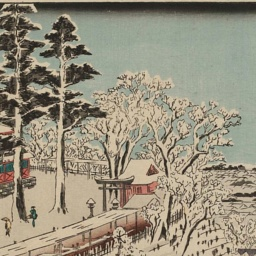

In [25]:
from datasets import DatasetDict, Dataset, load_dataset, Image

train_dataset = Dataset.from_dict({"image": df.loc[idx_train]['path'].tolist(),
                                   "label": df.loc[idx_train]['label'].tolist(),
                                  }).cast_column("image", Image())
train_dataset[0]["image"]

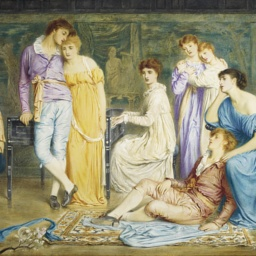

In [26]:
train_dataset[1]["image"]

In [27]:
train_dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 'ukiyo_e'}

In [28]:
dataset = DatasetDict({"train":train_dataset,
                       })
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 12500
    })
})

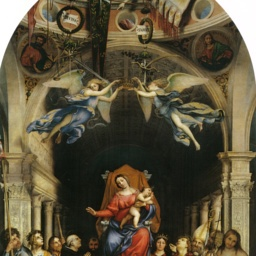

In [29]:
val_dataset = Dataset.from_dict({"image": df.loc[idx_val]['path'].tolist(),
                                   "label": df.loc[idx_val]['label'].tolist(),
                                  }).cast_column("image", Image())
val_dataset[0]["image"]

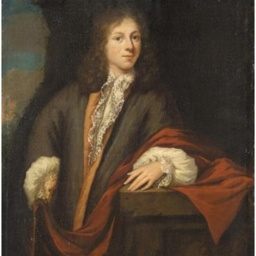

In [30]:
val_dataset[1]["image"]

In [31]:
val_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 1000
})